In [73]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [74]:
#Read in CSV
stats_df = pd.read_csv('seasons_stats.csv')
stats_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [75]:
#Add MVP column
stats_df['MVP'] = "0"

#Drop player stats prior to 1980. Drop rows with Tm as TOT.Drop empty rows
stats_df=stats_df[(stats_df["Year"]>=1980) & (stats_df["Tm"]!="TOT") & (stats_df["Year"]!= "")]

#Drop unnnecessary columns
stats_df=stats_df.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])

#Convert all NaN to zero
stats_df = stats_df.fillna(0)

In [76]:
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.639,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,0.0,1222.0,11.0,0.511,...,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,0.0,2168.0,19.2,0.571,...,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,0.0,560.0,7.4,0.524,...,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,0


In [77]:
#Add MVP winners

#1979-1980 Kareem Abdul-Jabbar
stats_df.at[5727, 'MVP']= 1
#1980-1981 Julius Erving
stats_df.at[6179, 'MVP']= 1
#1981-1982 Moses Malone
stats_df.at[6672, 'MVP']= 1
#1982-1983 Moses Malone
stats_df.at[7045, 'MVP']= 1
#1983-1984 Larry Bird
stats_df.at[7230, 'MVP']= 1
#1984-1985 Larry Bird
stats_df.at[7574, 'MVP']= 1
#1985-1986 Larry Bird
stats_df.at[7940, 'MVP']= 1
#1986-1987 Magic Johnson
stats_df.at[8459, 'MVP']= 1
#1987-1988 Michael Jordan
stats_df.at[8869, 'MVP']= 1
#1988-1989 Magic Johnson
stats_df.at[9283, 'MVP']= 1
#1989-1990 Magic Johnson
stats_df.at[9735, 'MVP']= 1
#1990-1991 Michael Jordan
stats_df.at[10212, 'MVP']= 1
#1991-1992 Michael Jordan
stats_df.at[10666, 'MVP']= 1
#1992-1993 Charles Barkley
stats_df.at[10937, 'MVP']= 1
#1993-1994 Hakeem Olajuwon
stats_df.at[11688, 'MVP']= 1
#1994-1995 David Robinson
stats_df.at[12182, 'MVP']= 1
#1995-1996 Michael Jordan
stats_df.at[12528, 'MVP']= 1
#1996-1997 Karl Malone
stats_df.at[13143, 'MVP']= 1
#1997-1998 Michael Jordan
stats_df.at[13654, 'MVP']= 1
#1998-1999 Karl Malone SHORTENED LOCKOUT SEASON
stats_df.at[14236, 'MVP']= 1
#1999-2000 Shaquille O'Neal
stats_df.at[14806, 'MVP']= 1
#2000-2001 Allen Iverson
stats_df.at[15186, 'MVP']= 1
#2001-2002 Tim Duncan
stats_df.at[15643, 'MVP']= 1
#2002-2003 Tim Duncan
stats_df.at[16129, 'MVP']= 1
#2003-2004 Kevin Garnett
stats_df.at[16674, 'MVP']= 1
#2004-2005 Steve Nash
stats_df.at[17452, 'MVP']= 1
#2005-2006 Steve Nash
stats_df.at[18020, 'MVP']= 1
#2006-2007 Dirk Nowitzki
stats_df.at[18569, 'MVP']= 1
#2007-2008 Kobe Bryant
stats_df.at[18825, 'MVP']= 1
#2008-2009 LeBron James
stats_df.at[19611, 'MVP']= 1
#2009-2010 LeBron James
stats_df.at[20207, 'MVP']= 1
#2010-11 Derrick Rose
stats_df.at[20991, 'MVP']= 1
#2011-2012 Lebron James
stats_df.at[21395, 'MVP']= 1
#2012-2013 LeBron James
stats_df.at[21933, 'MVP']= 1
#2013-2014 Kevin Durant
stats_df.at[22438, 'MVP']= 1
#2014-2015 Stephen Curry
stats_df.at[23000, 'MVP']= 1
#2015-2016 Stephen Curry
stats_df.at[23633, 'MVP']= 1
#2016-2017 Russell Westbrook
stats_df.at[24654, 'MVP']= 1

In [78]:
#Verify MVP Winners
print(stats_df.loc[stats_df['MVP'] == 1])

         Year                Player Pos   Age   Tm     G    GS      MP   PER  \
5727   1980.0  Kareem Abdul-Jabbar*   C  32.0  LAL  82.0   0.0  3143.0  25.3   
6179   1981.0        Julius Erving*  SF  30.0  PHI  82.0   0.0  2874.0  25.1   
6672   1982.0         Moses Malone*   C  26.0  HOU  81.0  81.0  3398.0  26.8   
7045   1983.0         Moses Malone*   C  27.0  PHI  78.0  78.0  2922.0  25.1   
7230   1984.0           Larry Bird*  PF  27.0  BOS  79.0  77.0  3028.0  24.2   
7574   1985.0           Larry Bird*  SF  28.0  BOS  80.0  77.0  3161.0  26.5   
7940   1986.0           Larry Bird*  SF  29.0  BOS  82.0  81.0  3113.0  25.6   
8459   1987.0        Magic Johnson*  PG  27.0  LAL  80.0  80.0  2904.0  27.0   
8869   1988.0       Michael Jordan*  SG  24.0  CHI  82.0  82.0  3311.0  31.7   
9283   1989.0        Magic Johnson*  PG  29.0  LAL  77.0  77.0  2886.0  26.9   
9735   1990.0        Magic Johnson*  PG  30.0  LAL  79.0  79.0  2937.0  26.6   
10212  1991.0       Michael Jordan*  SG 

In [7]:
#Convert MVP column to float type
stats_df["MVP"] = stats_df.MVP.astype(float)

In [8]:
stats_df.tail(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
24670,2017.0,Marvin Williams,PF,30.0,CHO,76.0,76.0,2295.0,13.7,0.551,...,89.0,409.0,498.0,106.0,58.0,53.0,60.0,134.0,849.0,0.0
24671,2017.0,Reggie Williams,SF,30.0,NOP,6.0,0.0,79.0,11.7,0.518,...,2.0,4.0,6.0,4.0,3.0,0.0,0.0,2.0,27.0,0.0
24673,2017.0,Troy Williams,SF,22.0,MEM,24.0,13.0,418.0,7.6,0.474,...,6.0,39.0,45.0,19.0,24.0,9.0,27.0,42.0,127.0,0.0
24674,2017.0,Troy Williams,SF,22.0,HOU,6.0,3.0,139.0,12.8,0.616,...,9.0,15.0,24.0,6.0,3.0,1.0,6.0,18.0,58.0,0.0
24675,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,0.0,44.0,6.7,0.437,...,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0,0.0
24676,2017.0,Justise Winslow,SF,20.0,MIA,18.0,15.0,625.0,8.2,0.399,...,23.0,71.0,94.0,66.0,27.0,6.0,33.0,52.0,196.0,0.0
24677,2017.0,Jeff Withey,C,26.0,UTA,51.0,1.0,432.0,18.8,0.588,...,52.0,69.0,121.0,7.0,16.0,32.0,14.0,52.0,146.0,0.0
24678,2017.0,Christian Wood,PF,21.0,CHO,13.0,0.0,107.0,15.1,0.591,...,14.0,15.0,29.0,2.0,3.0,6.0,7.0,11.0,35.0,0.0
24679,2017.0,Metta World,SF,37.0,LAL,25.0,2.0,160.0,6.2,0.380,...,5.0,15.0,20.0,11.0,9.0,2.0,7.0,18.0,57.0,0.0
24680,2017.0,Brandan Wright,PF,29.0,MEM,28.0,5.0,447.0,18.5,0.628,...,31.0,47.0,78.0,15.0,11.0,20.0,10.0,42.0,189.0,0.0


# Code below testing with just 3 features

In [9]:
# Separate the y variable, the labels
y = stats_df["MVP"]
# Separate the X variable, the features
X = stats_df[["PTS", "TRB", "AST"]]

In [10]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [12]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [13]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.5

In [15]:
confusion_matrix(y_test,testing_predictions)

array([[4312,    0],
       [  11,    0]], dtype=int64)

# Create Heatmap to select which columns to use as features based on correlation

<AxesSubplot:>

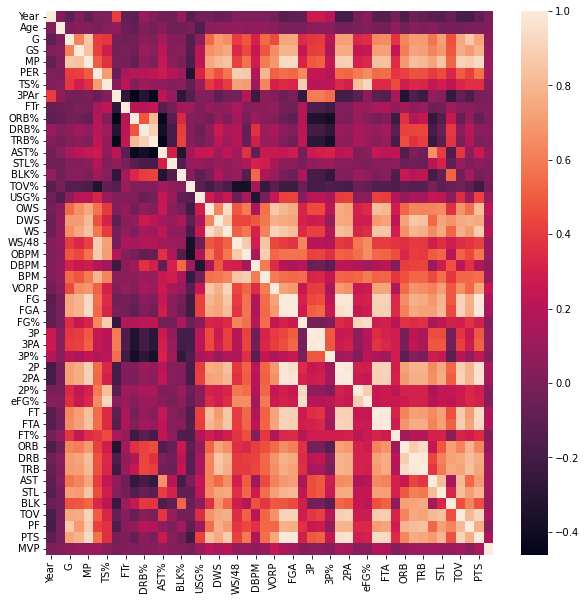

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(stats_df.corr())

In [72]:
#Drop columns we identified as not being relevent
stats_df=stats_df.drop(columns=['Year', '3PA', 'Pos', '3PAr', 'Tm', "eFG%", "FT%", "FTr", "Age", "Player", "GS","WS/48"])

KeyError: "['Year' '3PA' 'Pos' '3PAr' 'Tm' 'eFG%' 'FT%' 'FTr' 'Age' 'Player' 'GS'] not found in axis"

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(stats_df.corr())

# Run Logistic regression model with more features

In [19]:
# Separate the y variable, the labels
y = stats_df["MVP"]
# Separate the X variable, the features
X = stats_df.drop(columns=["MVP"])
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [21]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [22]:
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.6363636363636364

Text(69.0, 0.5, 'Truth')

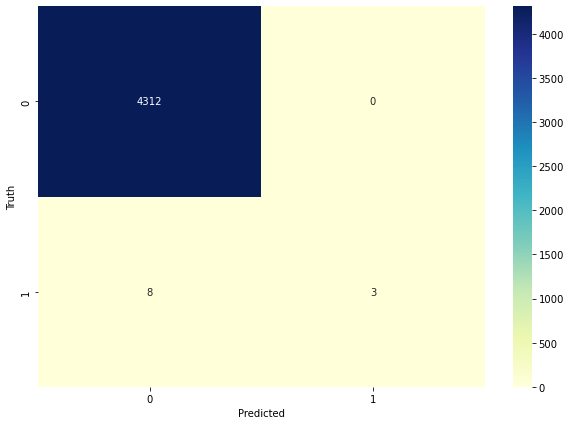

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=testing_predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Use RandomForestClassifier to figure out most impactful features

Text(0.5, 1.0, 'Random Forest')

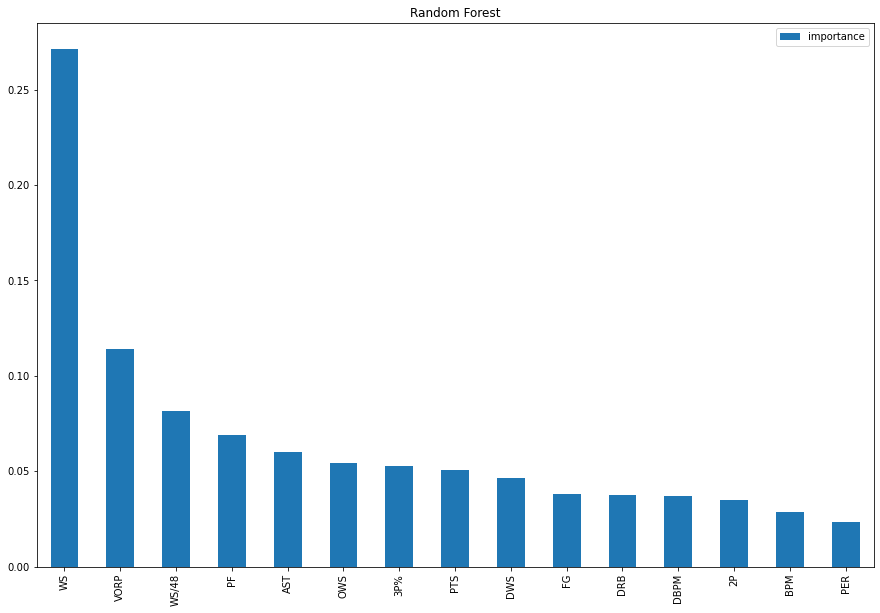

In [62]:
rf = RandomForestClassifier(max_features=15,random_state=1)
rf.fit(X,y)
importance = pd.DataFrame(rf.feature_importances_,index=X.columns.tolist(),columns=['importance']).sort_values(by='importance',ascending=False)
importance.head(20).plot(kind='bar',figsize = (15,10))
plt.title("Random Forest")

In [63]:
important_features = importance.index

## Use top 15 features for Logistic Regression

In [64]:
top_15_features = important_features[:15]

In [65]:
top_15_features

Index(['WS', 'VORP', 'WS/48', 'PF', 'AST', 'OWS', '3P%', 'PTS', 'DWS', 'FG',
       'DRB', 'DBPM', '2P', 'BPM', 'PER'],
      dtype='object')

In [66]:
# Separate the y variable, the labels
y = stats_df["MVP"]
# Separate the X variable, the features
X = stats_df[top_15_features]
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [68]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [69]:
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.6818181818181819

Text(69.0, 0.5, 'Truth')

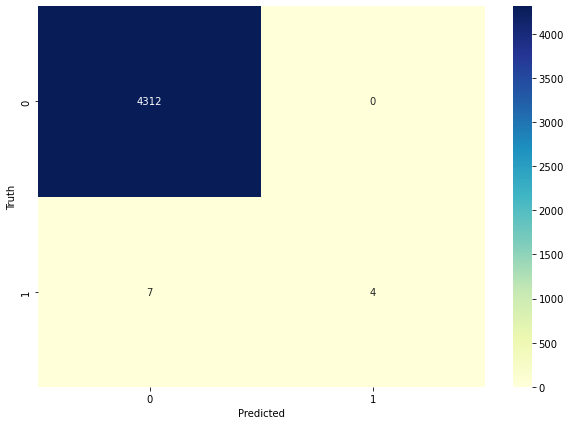

In [71]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=testing_predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Neural Network

In [35]:
# Separate the y variable, the labels
y = stats_df["MVP"]
# Separate the X variable, the features
X = stats_df.drop(columns=["MVP"])
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

39

In [38]:
# Define the number of neurons in the output layer
number_output_neurons = 1
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  20

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

20

In [39]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  10

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

10

In [40]:
# Create the Sequential model instance
nn = Sequential()
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                800       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
406/406 [==============================] - 1s 511us/step - loss: 0.0814 - accuracy: 0.9937
Epoch 2/50
406/406 [==============================] - 0s 502us/step - loss: 0.0123 - accuracy: 0.9979
Epoch 3/50
406/406 [==============================] - 0s 497us/step - loss: 0.0086 - accuracy: 0.9979
Epoch 4/50
406/406 [==============================] - 0s 495us/step - loss: 0.0071 - accuracy: 0.9979
Epoch 5/50
406/406 [==============================] - 0s 495us/step - loss: 0.0065 - accuracy: 0.9979
Epoch 6/50
406/406 [==============================] - 0s 500us/step - loss: 0.0063 - accuracy: 0.9979
Epoch 7/50
406/406 [==============================] - 0s 493us/step - loss: 0.0060 - accuracy: 0.9979
Epoch 8/50
406/406 [==============================] - 0s 509us/step - loss: 0.0058 - accuracy: 0.9979
Epoch 9/50
406/406 [==============================] - 0s 495us/step - loss: 0.0057 - accuracy: 0.9979
Epoch 10/50
406/406 [==============================] - 0s 500us/step - loss: 0.005

In [43]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

136/136 - 0s - loss: 0.0088 - accuracy: 0.9979 - 132ms/epoch - 968us/step
Loss: 0.008781252428889275, Accuracy: 0.9979181289672852


In [44]:
yp = nn.predict(X_test_scaled)
yp[:5]

array([[1.05736254e-13],
       [1.36732776e-08],
       [4.10567236e-06],
       [2.63095512e-06],
       [1.03102709e-08]], dtype=float32)

In [45]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [46]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4312
         1.0       1.00      0.18      0.31        11

    accuracy                           1.00      4323
   macro avg       1.00      0.59      0.65      4323
weighted avg       1.00      1.00      1.00      4323



Text(69.0, 0.5, 'Truth')

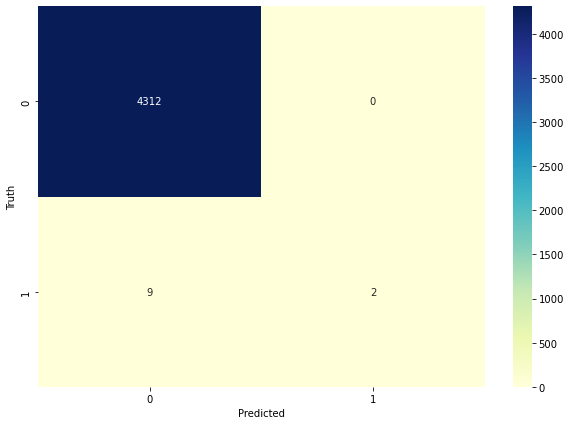

In [48]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Try Nueral Network on top 10 features

In [49]:
# Separate the y variable, the labels
y = stats_df["MVP"]
# Separate the X variable, the features
X = stats_df[top_15_features]
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

15

In [52]:
# Define the number of neurons in the output layer
number_output_neurons = 1
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  5

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

5

In [53]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  3

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

3

In [54]:
# Create the Sequential model instance
nn = Sequential()
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
# Display the Sequential model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 80        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
406/406 [==============================] - 0s 464us/step - loss: 0.2403 - accuracy: 0.9714
Epoch 2/50
406/406 [==============================] - 0s 460us/step - loss: 0.0490 - accuracy: 0.9979
Epoch 3/50
406/406 [==============================] - 0s 484us/step - loss: 0.0254 - accuracy: 0.9979
Epoch 4/50
406/406 [==============================] - 0s 466us/step - loss: 0.0154 - accuracy: 0.9979
Epoch 5/50
406/406 [==============================] - 0s 468us/step - loss: 0.0106 - accuracy: 0.9979
Epoch 6/50
406/406 [==============================] - 0s 468us/step - loss: 0.0085 - accuracy: 0.9980
Epoch 7/50
406/406 [==============================] - 0s 463us/step - loss: 0.0076 - accuracy: 0.9981
Epoch 8/50
406/406 [==============================] - 0s 463us/step - loss: 0.0074 - accuracy: 0.9981
Epoch 9/50
406/406 [==============================] - 0s 470us/step - loss: 0.0067 - accuracy: 0.9981
Epoch 10/50
406/406 [==============================] - 0s 475us/step - loss: 0.006

In [57]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

136/136 - 0s - loss: 0.0059 - accuracy: 0.9977 - 105ms/epoch - 773us/step
Loss: 0.005941902287304401, Accuracy: 0.9976868033409119


In [58]:
yp = nn.predict(X_test_scaled)
yp[:5]

array([[1.7893463e-07],
       [8.0482813e-08],
       [2.9438138e-03],
       [3.0938089e-03],
       [2.0703659e-05]], dtype=float32)

In [59]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4312
         1.0       1.00      0.09      0.17        11

    accuracy                           1.00      4323
   macro avg       1.00      0.55      0.58      4323
weighted avg       1.00      1.00      1.00      4323



Text(69.0, 0.5, 'Truth')

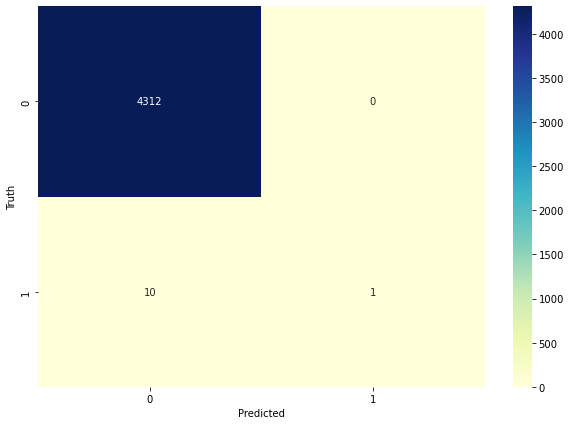

In [61]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')